In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#from PIL import Image
from warnings import filterwarnings
filterwarnings("ignore")
#from sklearn.pipeline import Pipeline
#from keras.models import load_model
import os


HEIGHT = 120
WEIGHT = 120



In [2]:
import tensorflow as tf #le noteboook ne fonctionne qu'avec TF2
print(tf.__version__)
#import tensorflow_transform as tft


2.3.0


In [3]:
train_dirs = ["kaggle/input/withwithout-mask/maskdata/maskdata/train",
             "kaggle/input/withwithout-mask/masks2.0/masks/train",
             "kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train",
             "kaggle/input/faces-with-masks"]

test_dirs = ["kaggle/input/withwithout-mask/maskdata/maskdata/test",
            "kaggle/input/withwithout-mask/masks2.0/masks/test",
            "kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test",
            "kaggle/input/face-mask-detection/dataset"]

validation_dirs = ["kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation"]

In [4]:
fullimg = []
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        fullimg.append(os.path.join(dirname, filename))
        
#print(os.listdir('kaggle/input'))
#print(fullimg)

# Preprocessing

In [87]:
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image
#tf.data.Dataset

print("Flowing Train")
train_dataset1 = tf.keras.preprocessing.image_dataset_from_directory(
    train_dirs[0], labels='inferred', label_mode='binary',
    class_names=["without_mask","with_mask"], color_mode='rgb', batch_size=77, image_size=(HEIGHT,WEIGHT),
    shuffle=True, seed=None, validation_split=None, subset=None,
    interpolation="nearest", follow_links=False
)
train_dataset2 = tf.keras.preprocessing.image_dataset_from_directory(
    train_dirs[1], labels='inferred', label_mode='binary',
    class_names=["0","1"], color_mode='rgb', batch_size=46, image_size=(HEIGHT,WEIGHT),
    shuffle=True, seed=None, validation_split=None, subset=None,
    interpolation="nearest", follow_links=False
)
train_dataset3 = tf.keras.preprocessing.image_dataset_from_directory(
    train_dirs[2], labels='inferred', label_mode='binary',
    class_names=["WithoutMask","WithMask"], color_mode='rgb', batch_size=19, image_size=(HEIGHT,WEIGHT), #change
    shuffle=True, seed=None, validation_split=None, subset=None,
    interpolation="nearest", follow_links=False
)
train_dataset4 = tf.keras.preprocessing.image_dataset_from_directory(
    train_dirs[3], labels='inferred', label_mode='binary',
    class_names=["_","faces_with_mask"], color_mode='rgb', batch_size=163, image_size=(HEIGHT,WEIGHT),
    shuffle=True, seed=None, validation_split=None, subset=None,
    interpolation="nearest", follow_links=False
)

train_datasets = [train_dataset1, train_dataset2, train_dataset3, train_dataset4]

print("\nFlowing Test")
test_dataset1 = tf.keras.preprocessing.image_dataset_from_directory(
    test_dirs[0], labels='inferred', label_mode='binary',
    class_names=["without_mask","with_mask"], color_mode='rgb', batch_size=66, image_size=(HEIGHT,WEIGHT),
    shuffle=True, seed=None, validation_split=None, subset=None,
    interpolation="nearest", follow_links=False
)
test_dataset2 = tf.keras.preprocessing.image_dataset_from_directory(
    test_dirs[1], labels='inferred', label_mode='binary',
    class_names=["0","1"], color_mode='rgb', batch_size=11, image_size=(HEIGHT,WEIGHT),
    shuffle=True, seed=None, validation_split=None, subset=None,
    interpolation="nearest", follow_links=False
)
test_dataset3 = tf.keras.preprocessing.image_dataset_from_directory(
    test_dirs[2], labels='inferred', label_mode='binary',
    class_names=["WithoutMask","WithMask"], color_mode='rgb', batch_size=62, image_size=(HEIGHT,WEIGHT),
    shuffle=True, seed=None, validation_split=None, subset=None,
    interpolation="nearest", follow_links=False
)
test_dataset4 = tf.keras.preprocessing.image_dataset_from_directory(
    test_dirs[3], labels='inferred', label_mode='binary',
    class_names=["without_mask","with_mask"], color_mode='rgb', batch_size=55, image_size=(HEIGHT,WEIGHT),
    shuffle=True, seed=None, validation_split=None, subset=None,
    interpolation="nearest", follow_links=False
)

test_datasets = [test_dataset1, test_dataset2, test_dataset3, test_dataset4]

print("\nFlowing Validation")
validation_dataset1 = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dirs[0], labels='inferred', label_mode='binary',
    class_names=["WithoutMask","WithMask"], color_mode='rgb', batch_size=80, image_size=(HEIGHT,WEIGHT),
    shuffle=True, seed=None, validation_split=None, subset=None,
    interpolation="nearest", follow_links=False
)


withWithoutMask = {"0":"Without Mask","1":"With Mask"}


Flowing Train
Found 616 files belonging to 2 classes.
Found 92 files belonging to 2 classes.
Found 95 files belonging to 2 classes.
Found 6 files belonging to 2 classes.

Flowing Test
Found 198 files belonging to 2 classes.
Found 33 files belonging to 2 classes.
Found 992 files belonging to 2 classes.
Found 440 files belonging to 2 classes.

Flowing Validation
Found 800 files belonging to 2 classes.


In [163]:
def test_preprocessing_layer(batch_input):
    t_batch = batch_input/255  
    t_batch = tf.convert_to_tensor(t_batch)        
    return t_batch


def train_preprocessing_layer(batch_input):   
    t_batch = []  
    for i in range(len(batch_input)):       
        img = batch_input[i]

        #rescale ./255
        img = img/255
        
        #shear
        img = tf.keras.preprocessing.image.random_shear(
        img, 0.2, row_axis=1, col_axis=2, channel_axis=0,
        fill_mode='nearest', cval=0.0, interpolation_order=1)

        #zoom
        img = tf.keras.preprocessing.image.random_zoom(
        img, (0.2,0.2) , row_axis=1, col_axis=2, channel_axis=0,
        fill_mode='nearest', cval=0.0, interpolation_order=1)

        #rotation
        img = tf.keras.preprocessing.image.random_rotation(
        img, 0.2, row_axis=1, col_axis=2, channel_axis=0, fill_mode='nearest',
        cval=0.0, interpolation_order=1)
        
        t_batch.append(img)
    
    t_batch = tf.convert_to_tensor(t_batch)
    
    return t_batch


def validation_preprocessing_layer(batch_input):   
    t_batch = []    
    for i in range(len(batch_input)):        
        img = batch_input[i]
        #rescale ./255
        img = img/255

        #shear
        img = tf.keras.preprocessing.image.random_shear(
        img, 0.2, row_axis=1, col_axis=2, channel_axis=0, #attention axis!! TODO
        fill_mode='nearest', cval=0.0, interpolation_order=1)

        #zoom
        img = tf.keras.preprocessing.image.random_zoom(
        img, (0.2,0.2) , row_axis=1, col_axis=2, channel_axis=0,
        fill_mode='nearest', cval=0.0, interpolation_order=1)
        
        #why no rotation? cf notebook initial
        
        t_batch.append(img)
    
    t_batch = tf.convert_to_tensor(t_batch)
    
    return t_batch

In [164]:
#train_dataset1 = train_dataset1.map(
#  lambda x, y : (train_preprocessing_layer(x) , y))


In [ ]:
#equivalent to map? 
train_list = [] #train (x,y) as a list of batch
for dataset in train_datasets:
    for i in range(dataset.__len__()):
        x, y = next(iter(dataset))
        x = train_preprocessing_layer(x)
        train_list.append((x,y))


In [ ]:
validation_list = [] #validation (x,y) as a list of batch
for i in range(validation_dataset1.__len__()):
    x, y = next(iter(validation_dataset1))
    x = validation_preprocessing_layer(x)
    validation_list.append((x,y))

In [ ]:
test_list = [] #test (x,y) as a list of batch
for dataset in test_datasets:
    for i in range(dataset.__len__()):
        x, y = next(iter(dataset))
        x = test_preprocessing_layer(x)
        test_list.append((x,y))


In [ ]:
def combine_tuple(tuples_list): 
    x_list= []
    y_list= []
    for x,y in tuples_list:
        x_list.append(x) 
        y_list.append(y)
        
    x_list = np.concatenate(x_list)
    y_list = np.concatenate(y_list)
    y_list = y_list.astype(int)
    return x_list ,y_list

x_train, y_train = combine_tuple(train_list)
x_val, y_val = combine_tuple(validation_list)
x_test, y_test = combine_tuple(test_list)

In [ ]:
print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(x_val))
print(np.shape(y_train))
print(np.shape(y_test))
print(np.shape(y_val))

# Build Model

In [ ]:
# change from keras to TF.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, SpatialDropout2D, BatchNormalization, Input, Activation, Dense, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import binary_crossentropy

#Try with prerocessinglayer inside the model TODO

def build_model():
        model = Sequential()
        model.add(Input(shape=(HEIGHT,WEIGHT,3,)))

        model.add(Conv2D(filters=16,kernel_size=(2,2),padding="same"))
        model.add(Activation("relu"))
        model.add(SpatialDropout2D(0.25))
        
        model.add(MaxPool2D(pool_size=(4,4)))

        model.add(Conv2D(filters=32,kernel_size=(2,2),padding="same"))
        model.add(Activation("relu"))
        model.add(SpatialDropout2D(0.25))
        
        model.add(MaxPool2D(pool_size=(4,4),strides=(4,4)))
               
        model.add(Flatten())
        
        model.add(Dense(2048))
        model.add(Activation("relu"))
        model.add(Dropout(0.25))
        
        model.add(Dense(1024))
        model.add(Activation("relu"))
        model.add(Dropout(0.2))
        
        
        model.add(Dense(1))
        model.add(Activation("sigmoid"))
        
        optimizer = Adam(lr=0.001)
        model.compile(optimizer = optimizer ,metrics=["accuracy"], loss = binary_crossentropy)
        
        return model

In [ ]:
model = build_model()
plot_model(model,show_shapes=True,show_layer_names=True)

# Train Model

In [ ]:
reducer = ReduceLROnPlateau(monitor='loss',patience=3,factor=0.75,min_lr=0.000001,verbose=1)
stopSign = EarlyStopping(monitor = "loss",patience=20,min_delta=0.000000000001,mode="min")

epochs = 5
batch_size = 32
steps_per_epoch = x_train.shape[0] // batch_size
history = model.fit(x_train,y_train,
                    epochs = epochs, 
                    validation_data = (x_val,y_val),
                    verbose = 1,
                    batch_size=batch_size,
                    steps_per_epoch = steps_per_epoch,
                    callbacks=[reducer,stopSign])

In [ ]:
model.save('trained_model') #NEW

# Prediction

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

ypred = model.predict_classes(x_test)
plt.subplots(figsize=(18,14))
sns.heatmap(confusion_matrix(ypred,y_test),annot=True,fmt="1.0f",cbar=False,annot_kws={"size": 20})
plt.title(f"CNN Accuracy: {accuracy_score(ypred,y_test)}",fontsize=40)
plt.xlabel("Target",fontsize=30)
plt.show()

In [147]:
np.shape(x_test)

(1663, 120, 120, 3)

In [148]:
plt.figure(figsize=(50,50))
tempc = np.random.choice(x_test[y_test == ypred.ravel()].shape[0],35,replace=False)
d = 0
for i in tempc:
    plt.subplot(7, 5, d+1)
    d += 1
    tempc = np.random.randint(x_test[y_test == ypred.ravel()].shape[0])
    plt.imshow(x_test[y_test == ypred.ravel()][tempc])
    plt.title(f"True:{withWithoutMask[str(y_test[y_test == ypred.ravel()][tempc])]}\nPredicted:{withWithoutMask[str(ypred.ravel()[y_test == ypred.ravel()][tempc])]}",
              fontsize=40)
    plt.axis("off")
plt.subplots_adjust(wspace=-0.1, hspace=0.3)
plt.show()

IndexError: boolean index did not match indexed array along dimension 1; dimension is 120 but corresponding boolean dimension is 1663

<Figure size 3600x3600 with 0 Axes>

In [ ]:
plt.figure(figsize=(50,50))
tempc = np.random.choice(x_test[y_test != ypred.ravel()].shape[0],35,replace=False)
d = 0
for i in tempc:
    plt.subplot(7, 5, d+1)
    d += 1
    tempc = np.random.randint(x_test[y_test != ypred.ravel()].shape[0])
    plt.imshow(x_test[y_test != ypred.ravel()][tempc])
    plt.title(f"True:{withWithoutMask[str(y_test[y_test != ypred.ravel()][tempc])]}\nPredicted:{withWithoutMask[str(ypred.ravel()[y_test != ypred.ravel()][tempc])]}",
             fontsize=40)
    plt.axis("off")
plt.subplots_adjust(wspace=-0.1, hspace=0.3)
plt.show()

[[0.9999997]]


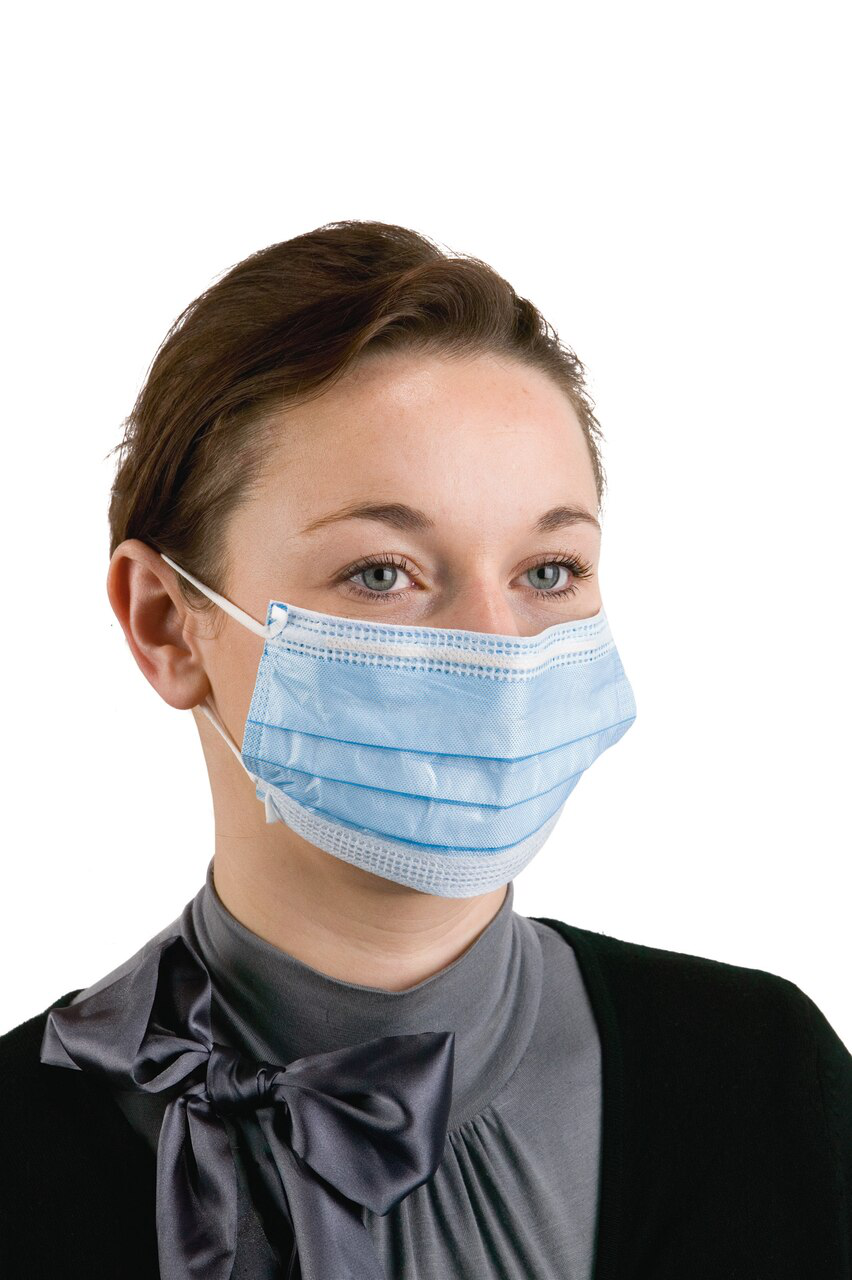

In [55]:
#FOR JUST ONE IMG
import PIL

img_path = fullimg[0] #550 sans mask

pil_img = PIL.Image.open(img_path)

test_img = tf.keras.preprocessing.image.img_to_array(pil_img)

test_img = tf.image.resize(test_img, [HEIGHT,WEIGHT],antialias=True) #resize

test_img = tf.expand_dims(test_img, axis=0) #add a dimension with size of the batch, 1 in our case for prediction

pred = model.predict(test_img)

print(pred)

pil_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.87


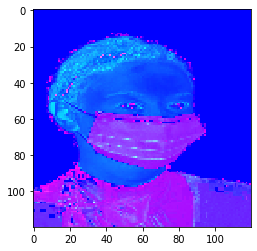

In [62]:
#with another library: https://www.tensorflow.org/api_docs/python/tf/image

import PIL
import tensorflow.image as tfi

img_path = fullimg[0] #550 sans mask

pil_img = PIL.Image.open(img_path)

new_img = tf.keras.preprocessing.image.img_to_array(pil_img)

new_img = tfi.rgb_to_hsv(new_img) #rescale /255 ?

zoom = np.random.randint(80, 100) /100
print(zoom)
crop = tfi.central_crop(new_img, zoom)
img = tfi.resize(crop, [HEIGHT,WEIGHT], method='nearest')
#zoom_range=0.2

#shear_range=0.2 #shear_range: Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
#rotation_range=0.2

plt.imshow(img)
